In [161]:
import yaml
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor

In [2]:
# processor = AutoProcessor.from_pretrained("tensorspeech/tts-fastspeech2-ljspeech-en")

In [3]:
input_text = "i love you so much."
input_ids = processor.text_to_sequence(input_text)

In [4]:
fastspeech2 = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech2-ljspeech-en")

# Save to Pb

In [5]:
# save model into pb and do inference. Note that signatures should be a tf.function with input_signatures.
tf.saved_model.save(fastspeech2, "./test_saved", signatures=fastspeech2.inference)

INFO:tensorflow:Assets written to: ./test_saved/assets


INFO:tensorflow:Assets written to: ./test_saved/assets


# Load and Inference

In [6]:
fastspeech2 = tf.saved_model.load("./test_saved")

In [7]:
input_text = "There’s a way to measure the acute emotional intelligence that has never gone out of style."
input_ids = processor.text_to_sequence(input_text)

In [8]:
mel_before, mel_after, duration_outputs, _, _ = fastspeech2.inference(
    input_ids=tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
    speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
    speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    f0_ratios =tf.convert_to_tensor([1.0], dtype=tf.float32),
    energy_ratios =tf.convert_to_tensor([1.0], dtype=tf.float32)
)

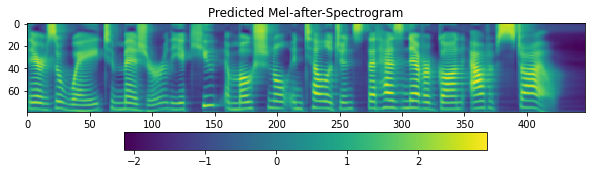

In [9]:
mel_after = tf.reshape(mel_after, [-1, 80]).numpy()
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title(f'Predicted Mel-after-Spectrogram')
im = ax1.imshow(np.rot90(mel_after), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()
plt.close()

# Let inference other input to check dynamic shape

In [10]:
input_text = "The Commission further recommends that the Secret Service coordinate its planning as closely as possible with all of the Federal agencies from which it receives information."
input_ids = processor.text_to_sequence(input_text)

In [11]:
mel_before, mel_after, duration_outputs, _, _ = fastspeech2.inference(
    input_ids=tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
    speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
    speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    f0_ratios =tf.convert_to_tensor([1.0], dtype=tf.float32),
    energy_ratios =tf.convert_to_tensor([1.0], dtype=tf.float32)
)

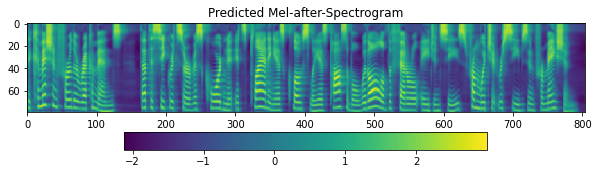

In [12]:
mel_after = tf.reshape(mel_after, [-1, 80]).numpy()
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title(f'Predicted Mel-after-Spectrogram')
im = ax1.imshow(np.rot90(mel_after), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()
plt.close()

In [17]:
import yaml
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel

from IPython.display import (
    Audio, display, clear_output)


In [15]:
mb_melgan = TFAutoModel.from_pretrained("tensorspeech/tts-mb_melgan-ljspeech-en")
tf.saved_model.save(mb_melgan, "./mb_melgan", signatures=mb_melgan.inference)

INFO:tensorflow:Assets written to: ./mb_melgan/assets


INFO:tensorflow:Assets written to: ./mb_melgan/assets


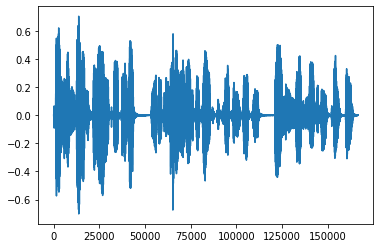

In [18]:
mb_melgan = tf.saved_model.load("./mb_melgan")
mels = np.load("../dump_ljspeech/valid/norm-feats/LJ001-0009-norm-feats.npy")
audios = mb_melgan.inference(mels[None, ...])
plt.plot(audios[0, :, 0])

In [20]:
Audio(audios[0, :, 0], rate=24000, autoplay=True)

# load local
from [here](https://github.com/dathudeptrai/TensorFlowTTS/blob/master/notebooks/multiband_melgan_inference.ipynb)

In [79]:
# initialize fastspeech model.
from pathlib import Path
Path('../pretrained/fastspeech2.v1/conf/fastspeech2.v1.yaml')

fs_config = AutoConfig.from_pretrained('../pretrained/fastspeech2.v1/conf/fastspeech2.v1.yaml')
fastspeech = TFAutoModel.from_pretrained(
    config=fs_config,
    pretrained_path="../pretrained/fastspeech2.v1/checkpoints/model-150000.h5"
)



In [80]:
# initialize melgan model
config = AutoConfig.from_pretrained("../pretrained/mbvocs24k/multiband_melgan.v1_24k.yaml")
mb_melgan = TFAutoModel.from_pretrained(
    config=config, 
    pretrained_path='../pretrained/mbvocs24k/libritts_24k.h5', # "../examples/fastspeech2/checkpoints/model-150000.h5",
    name="melgan"
)

In [65]:
# fake_mels = tf.random.uniform(shape=[4, 256, 80], dtype=tf.float32)
# audios = mb_melgan.inference(fake_mels)
mels = np.load("../dump_ljspeech/valid/norm-feats/LJ001-0009-norm-feats.npy")
audios = mb_melgan.inference(mels[None, ...])
Audio(audios[0, :, 0], rate=24000, autoplay=True)

In [84]:
# inference
processor = AutoProcessor.from_pretrained(pretrained_path="../dump_ljspeech/ljspeech_mapper.json")
ids = processor.text_to_sequence("Recent research at Harvard has shown meditating for as little as 8 weeks, can actually increase the grey matter in the parts of the brain responsible for emotional regulation, and learning.")
ids = tf.expand_dims(ids, 0)


In [157]:
input_ids = processor.text_to_sequence("Cats and boots")
# input_ids = tf.expand_dims(ids, 0)


In [158]:
# masked_mel_before, masked_mel_after, duration_outputs = fastspeech.inference(
#     ids,
#     speaker_ids=tf.zeros(shape=[tf.shape(ids)[0]], dtype=tf.int32),
#     speed_ratios=tf.constant([1.0], dtype=tf.float32)
# )
mel_before, mel_after, duration_outputs, _, _ = fastspeech2.inference(
    input_ids=tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
    speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
    speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    f0_ratios =tf.convert_to_tensor([1.0], dtype=tf.float32),
    energy_ratios =tf.convert_to_tensor([1.0], dtype=tf.float32)
)

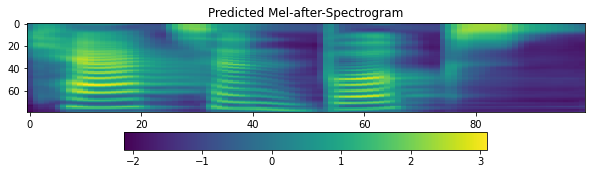

In [159]:
mel_after = tf.reshape(mel_after, [-1, 80]).numpy()
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title(f'Predicted Mel-after-Spectrogram')
im = ax1.imshow(np.rot90(mel_after), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()
plt.close()


In [160]:
audios = mb_melgan.inference(mel_after[None, ...])
Audio(audios[0, :, 0], rate=24000, autoplay=True)